In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    time.sleep(5)
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        print(f"{i} sleeping...")
        time.sleep(120)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waingapu
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | iquitos
Processing Record 4 of Set 1 | kamina
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | buala
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | smolenka
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | privolnyy
Processing Record 18 of Set 1 | kizukuri
Processing Record 19 of Set 1 | vanavara
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | m

Processing Record 36 of Set 4 | mantsala
Processing Record 37 of Set 4 | mount isa
Processing Record 38 of Set 4 | pevek
Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | rapallo
Processing Record 41 of Set 4 | hinesville
Processing Record 42 of Set 4 | bluff
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | marshall
Processing Record 46 of Set 4 | pakokku
Processing Record 47 of Set 4 | haverfordwest
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | muisne
Processing Record 50 of Set 4 | chokurdakh
200 sleeping...
Processing Record 1 of Set 5 | praia da vitoria
Processing Record 2 of Set 5 | sao joao da barra
Processing Record 3 of Set 5 | conroe
Processing Record 4 of Set 5 | biak
Processing Record 5 of Set 5 | marrakesh
Processing Record 6 of Set 5 | tasiilaq
Processing Record 7 of Set 5 | charters towers
Processing Record 8 of Set 5 | ancud
Processi

Processing Record 23 of Set 8 | badgam
City not found. Skipping...
Processing Record 24 of Set 8 | lamar
Processing Record 25 of Set 8 | rajula
Processing Record 26 of Set 8 | constantine
Processing Record 27 of Set 8 | veliki preslav
Processing Record 28 of Set 8 | sao gabriel da cachoeira
Processing Record 29 of Set 8 | belyy yar
Processing Record 30 of Set 8 | namatanai
Processing Record 31 of Set 8 | along
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | poopo
Processing Record 34 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 35 of Set 8 | japura
Processing Record 36 of Set 8 | puerto narino
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | port talbot
Processing Record 39 of Set 8 | kijini
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | dolores
Processing Record 42 of Set 8 | san lorenzo
Processing Record 43 of Set 8 | fougamou
Processing Record 44 of Set 8 | wajir
Processing Record 45 of Se

Processing Record 8 of Set 12 | loikaw
Processing Record 9 of Set 12 | mitchell
Processing Record 10 of Set 12 | biltine
Processing Record 11 of Set 12 | takanabe
Processing Record 12 of Set 12 | rockport
Processing Record 13 of Set 12 | coquimbo
Processing Record 14 of Set 12 | roald
Processing Record 15 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 16 of Set 12 | coihaique
Processing Record 17 of Set 12 | silver city
Processing Record 18 of Set 12 | ukiah
Processing Record 19 of Set 12 | soyo
Processing Record 20 of Set 12 | ambulu
Processing Record 21 of Set 12 | kuusamo
Processing Record 22 of Set 12 | bubaque
Processing Record 23 of Set 12 | porto novo
Processing Record 24 of Set 12 | nicolas bravo
Processing Record 25 of Set 12 | regente feijo
Processing Record 26 of Set 12 | santa isabel do rio negro
Processing Record 27 of Set 12 | utiroa
City not found. Skipping...
Processing Record 28 of Set 12 | urbino
Processing Record 29 of Set 12 | katherine
Process

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(100)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Waingapu,-9.6567,120.2641,81.95,63,44,2.46,ID,2022-09-28 00:26:22
1,Port Lincoln,-34.7333,135.8667,53.51,65,100,11.90,AU,2022-09-28 00:23:06
2,Iquitos,-3.7481,-73.2472,84.24,65,75,5.75,PE,2022-09-28 00:26:33
3,Kamina,-8.7386,24.9906,72.66,54,85,3.49,CD,2022-09-28 00:26:38
4,Punta Arenas,-53.1500,-70.9167,44.71,70,0,12.66,CL,2022-09-28 00:24:06
...,...,...,...,...,...,...,...,...,...
95,Vaini,-21.2000,-175.2000,77.16,88,75,4.61,TO,2022-09-28 00:39:40
96,Viedma,-40.8135,-62.9967,47.44,48,0,9.82,AR,2022-09-28 00:39:51
97,Tuktoyaktuk,69.4541,-133.0374,32.00,100,100,20.71,CA,2022-09-28 00:39:56
98,Nouakchott,18.0858,-15.9785,84.13,74,74,10.51,MR,2022-09-28 00:40:02


In [27]:
len(city_data_df)

543

In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

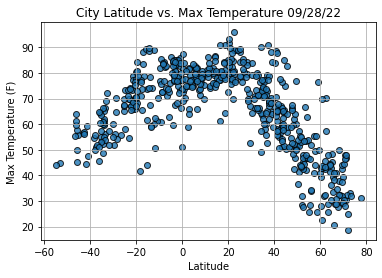

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/latitude_vs_max_temp.png")

# Show plot.
plt.show()

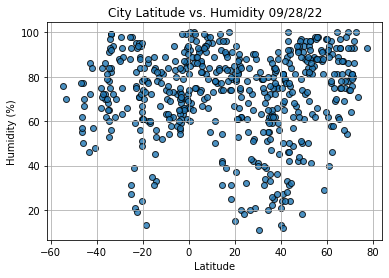

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/latitude_vs_humidity.png")

# Show plot.
plt.show()

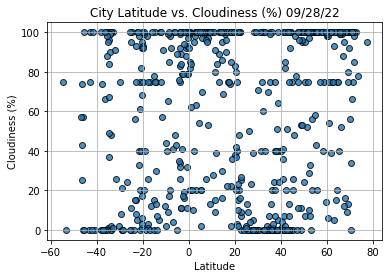

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latitude_vs_cloudiness.png")
# Show plot.
plt.show()

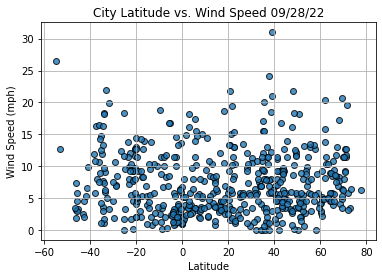

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latitude_vs_wind_speed.png")
# Show plot.
plt.show()